In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_path = '../data/DATA_FUSION/data/relevantes/acidentes_com_estacoes.csv'

data = pd.read_csv(data_path)
data

,n_da_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,...,geometry,regiao,codigo_estacao,nome_estacao,lat,long,alt,data_fundacao,nome_arquivo,distance
0,1,316.0,BR-101/SC,Decrescente,Saída de pista,2,0,0,0,0,...,POINT (-48.81333333 -28.60444444),S,Laguna - Farol de Santa Marta,A866,-28.604444,-48.813333,34.36,2008-06-01,../data/INMET/2022/INMET_S_SC_A866_Laguna - F...,20.314712
1,1,316.0,BR-101/SC,Decrescente,Saída de pista,2,0,0,0,0,...,POINT (-48.81333333 -28.60444444),S,Laguna - Farol de Santa Marta,A866,-28.604444,-48.813333,34.36,2008-06-01,../data/INMET/2022/INMET_S_SC_A866_Laguna - F...,20.252761
2,12,350.0,BR-101/SC,Decrescente,Saída de pista,0,0,1,0,0,...,POINT (-48.81333333 -28.60444444),S,Laguna - Farol de Santa Marta,A866,-28.604444,-48.813333,34.36,2008-06-01,../data/INMET/2022/INMET_S_SC_A866_Laguna - F...,23.206838
3,12,350.0,BR-101/SC,Decrescente,Saída de pista,0,0,1,0,0,...,POINT (-48.81333333 -28.60444444),S,Laguna - Farol de Santa Marta,A866,-28.604444,-48.813333,34.36,2008-06-01,../data/INMET/2022/INMET_S_SC_A866_Laguna - F...,23.300760
4,13,378.0,BR-101/SC,Decrescente,Capotamento,1,0,0,0,0,...,POINT (-49.31527777 -28.53249999),S,URUSSANGA,A814,-28.532500,-49.315278,40.56,2008-05-29,../data/INMET/2022/INMET_S_SC_A814_URUSSANGA_0...,24.571906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67707,110,316.0,BR-101/SC,Decrescente,Queda de moto,1,0,0,0,0,...,POINT (-48.81333333 -28.60444444),S,Laguna - Farol de Santa Marta,A866,-28.604444,-48.813333,34.36,2008-06-01,../data/INMET/2022/INMET_S_SC_A866_Laguna - F...,20.252761
67708,36,382.0,BR-101/SC,Decrescente,Saída de pista,1,0,0,0,0,...,POINT (-49.49792 -28.931353),S,ARARANGUA,A867,-28.931353,-49.497920,2.00,2008-09-28,../data/INMET/2022/INMET_S_SC_A867_ARARANGUA_0...,26.176624
67709,36,382.0,BR-101/SC,Decrescente,Saída de pista,1,0,0,0,0,...,POINT (-49.31527777 -28.53249999),S,URUSSANGA,A814,-28.532500,-49.315278,40.56,2008-05-29,../data/INMET/2022/INMET_S_SC_A814_URUSSANGA_0...,26.142459
67710,34,372.0,BR-101/SC,Decrescente,Saída de pista,1,0,0,0,0,...,POINT (-49.31527777 -28.53249999),S,URUSSANGA,A814,-28.532500,-49.315278,40.56,2008-05-29,../data/INMET/2022/INMET_S_SC_A814_URUSSANGA_0...,22.092962


In [4]:
data.columns

Index(['n_da_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente',
       'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros',
       'tracao_animal', 'transporte_de_cargas_especiais', 'trator_maquinas',
       'utilitarios', 'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos', 'concessionaria', 'data_hora',
       'com_vitima', 'estado', 'ano', 'mes', 'latitude', 'longitude',
       'geometry', 'regiao', 'codigo_estacao', 'nome_estacao', 'lat', 'long',
       'alt', 'data_fundacao', 'nome_arquivo', 'distance'],
      dtype='object')

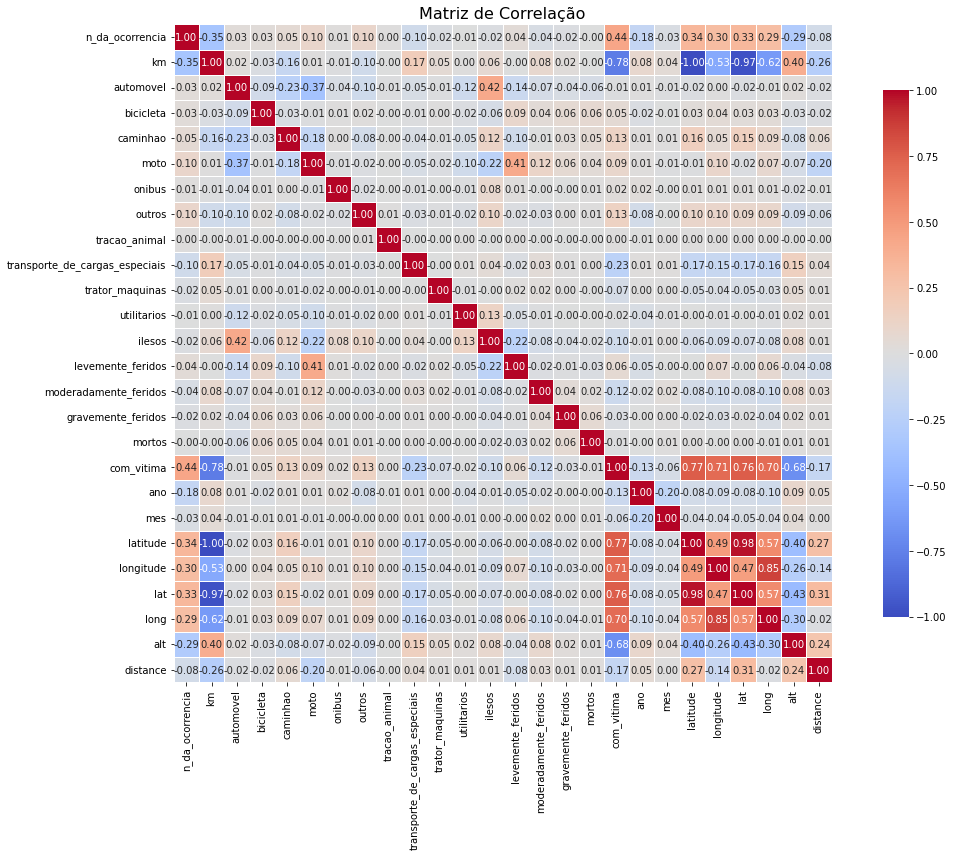

In [10]:
def plot_correlation_matrix(dataframe, figsize=(16, 12), cmap="coolwarm"):
    """
    Gera um gráfico de mapa de calor com a matriz de correlação das variáveis de um dataframe usando Seaborn.
    
    Args:
        dataframe (pd.DataFrame): O conjunto de dados cujas variáveis serão correlacionadas.
        figsize (tuple): Tamanho da figura (largura, altura).
        cmap (str): O mapa de cores usado para o gráfico.
        
    Returns:
        None: Mostra o gráfico diretamente.
    """
    # Calcula a matriz de correlação
    correlation_matrix = dataframe.corr()

    # Configura o tamanho da figura
    plt.figure(figsize=figsize)

    # Gera o mapa de calor com Seaborn
    sns.heatmap(
        correlation_matrix,
        annot=True,        # Mostra os valores dentro das células
        fmt=".2f",         # Formata os números para duas casas decimais
        cmap=cmap,         # Define o mapa de cores
        vmin=-1, vmax=1,   # Escala de cores entre -1 e 1
        square=True,       # Formato quadrado para as células
        linewidths=0.5,    # Linhas entre células
        cbar_kws={"shrink": 0.8}  # Configuração da barra de cores
    )
    
    # Adiciona título
    plt.title("Matriz de Correlação", fontsize=16)
    
    # Mostra o gráfico
    plt.tight_layout()
    plt.show()


plot_correlation_matrix(data)